In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [81]:
df=pd.read_csv('/content/drive/MyDrive/Datset/Social Platform Influence on Productivity(Responses) - Form Responses 1 (9).csv')
df.head()

,Timestamp,Age,Gender,Study Hours,Average daily social media usage (hr)\n,Frequency of Checking social Media \n,Time Spend Per Session (mins)\n,Preferred Time\n,Study/Assignment Completion Rate\n,Feeling of Laziness After Using Social Media\n,Usage of Social Platform Before Sleep\n,Impact on Academic Productivity \n,Most Used Social Media Platform \n,Primary Purpose For Using Social Media\n,Frequency of Using Social Media for Academic Purpose:\n,Do You Think It Contributes To Your Study,Column 13
0,11/23/2024 13:35:30,24.0,Male,4-6,4,Frequently,50-60,Night,Always on time,No,Yes,Positive,Facebook,Entertainment,Most of the time,Yes,NaN
1,11/23/2024 13:37:40,21.0,Female,0-1,4,Frequently,50-60,Afternoon,Always on time,Yes,Yes,Strong Negative,Youtube,Entertainment,Sometimes,Yes,NaN
2,11/23/2024 13:44:27,23.0,Female,1-3,2,Frequently,10-20,Night,Frequently delay,Yes,Yes,Neutral,Instagram,Entertainment,Sometimes,Yes,NaN
3,11/23/2024 13:46:24,22.0,Female,0-1,2,Frequently,30-40,Night,Frequently delay,Yes,Yes,Neutral,Instagram,Entertainment,Rare,No,NaN
4,11/23/2024 13:47:40,16.0,Male,0-1,5,Frequently,30-40,Night,Always on time,Yes,Yes,Neutral,Youtube,Entertainment,Sometimes,Yes,NaN


In [82]:
df1=df.drop(["Column 13","Timestamp"], axis=1)

In [83]:
df1=df.drop(["Column 13","Timestamp"], axis=1)

In [84]:
df1.head()

,Age,Gender,Study Hours,Average daily social media usage (hr)\n,Frequency of Checking social Media \n,Time Spend Per Session (mins)\n,Preferred Time\n,Study/Assignment Completion Rate\n,Feeling of Laziness After Using Social Media\n,Usage of Social Platform Before Sleep\n,Impact on Academic Productivity \n,Most Used Social Media Platform \n,Primary Purpose For Using Social Media\n,Frequency of Using Social Media for Academic Purpose:\n,Do You Think It Contributes To Your Study
0,24.0,Male,4-6,4,Frequently,50-60,Night,Always on time,No,Yes,Positive,Facebook,Entertainment,Most of the time,Yes
1,21.0,Female,0-1,4,Frequently,50-60,Afternoon,Always on time,Yes,Yes,Strong Negative,Youtube,Entertainment,Sometimes,Yes
2,23.0,Female,1-3,2,Frequently,10-20,Night,Frequently delay,Yes,Yes,Neutral,Instagram,Entertainment,Sometimes,Yes
3,22.0,Female,0-1,2,Frequently,30-40,Night,Frequently delay,Yes,Yes,Neutral,Instagram,Entertainment,Rare,No
4,16.0,Male,0-1,5,Frequently,30-40,Night,Always on time,Yes,Yes,Neutral,Youtube,Entertainment,Sometimes,Yes


<Axes: ylabel='count'>

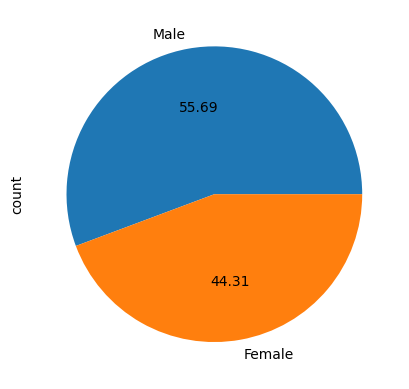

In [85]:
df1['Gender'].value_counts().plot(kind='pie', autopct='%.2f')

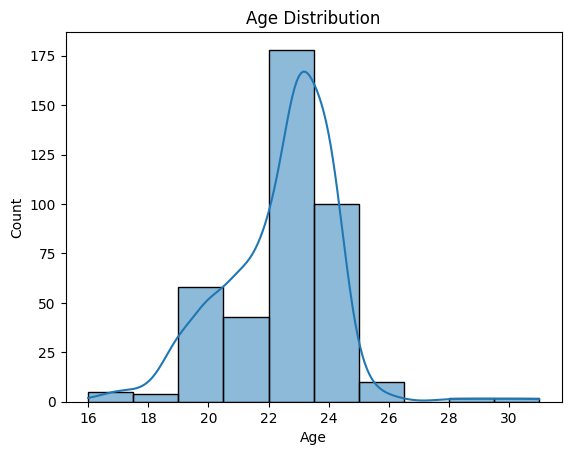

In [86]:
sns.histplot(df1['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.show()

<ipython-input-87-ffe9e3442105>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_counts.values, y=platform_counts.index, palette='coolwarm')


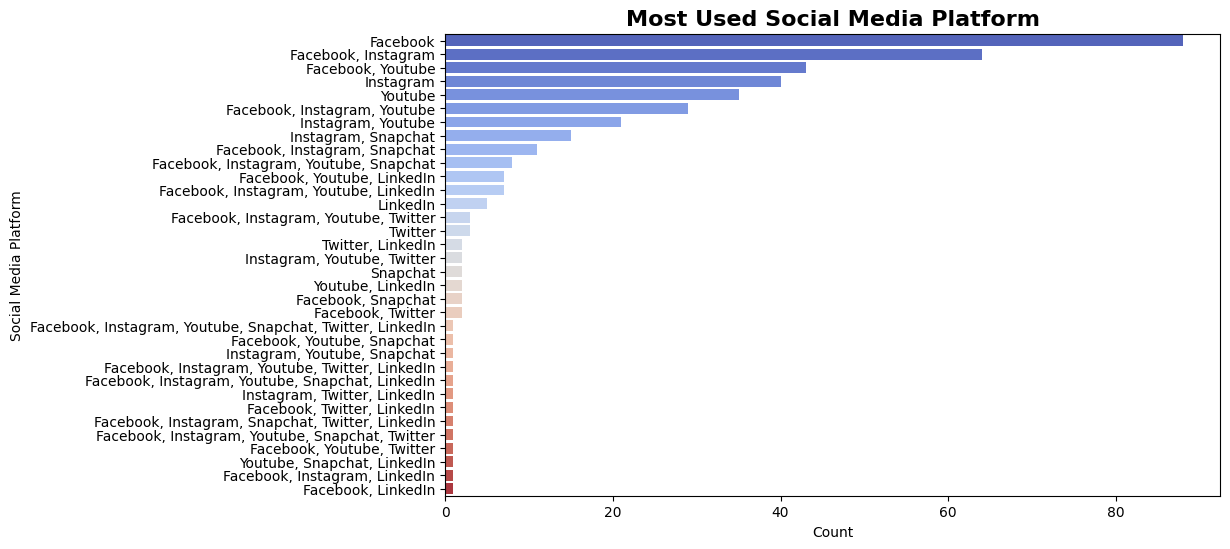

In [87]:

plt.figure(figsize=(10, 6))
platform_counts = df1['Most Used Social Media Platform \n'].value_counts()


sns.barplot(x=platform_counts.values, y=platform_counts.index, palette='coolwarm')
plt.title('Most Used Social Media Platform', fontsize=16, fontweight='bold')
plt.xlabel('Count')
plt.ylabel('Social Media Platform')
plt.show()

<ipython-input-88-0835a3692660>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_counts.values, y=platform_counts.index, palette='Set1')


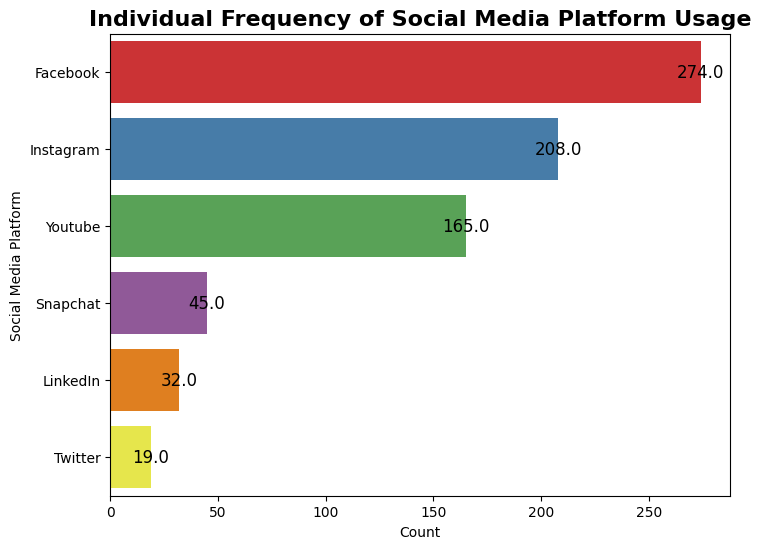

In [88]:
platforms_exploded = df1['Most Used Social Media Platform \n'].str.split(',').explode().str.strip()

platform_counts = platforms_exploded.value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=platform_counts.values, y=platform_counts.index, palette='Set1')


for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_width()}', (p.get_width() - 0.1, p.get_y() + p.get_height() / 2.), ha='center', va='center', fontsize=12, color='black')

plt.title('Individual Frequency of Social Media Platform Usage', fontsize=16, fontweight='bold')
plt.xlabel('Count')
plt.ylabel('Social Media Platform')
plt.show()


<ipython-input-89-3e1dde09cb69>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=purpose_counts.index, y=purpose_counts.values, palette='Set2')


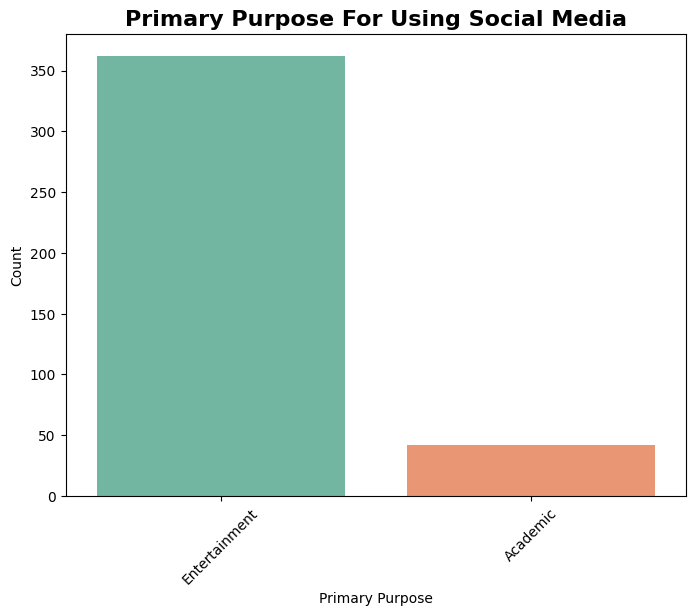

In [89]:

plt.figure(figsize=(8, 6))
purpose_counts = df1['Primary Purpose For Using Social Media\n'].value_counts()

sns.barplot(x=purpose_counts.index, y=purpose_counts.values, palette='Set2')
plt.title('Primary Purpose For Using Social Media', fontsize=16, fontweight='bold')
plt.xlabel('Primary Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


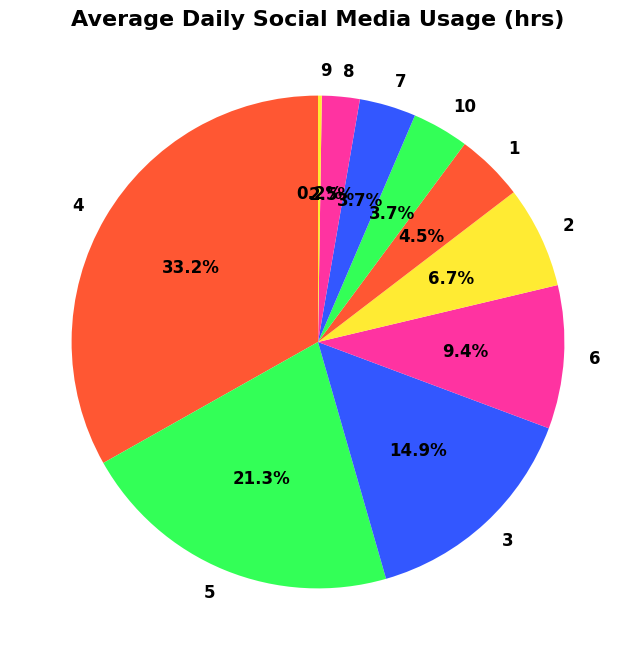

In [90]:
plt.figure(figsize=(8, 8))
usage_counts = df1['Average daily social media usage (hr)\n'].value_counts()

colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A1', '#FFEB33']
plt.pie(usage_counts, labels=usage_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 12, 'fontweight': 'bold'})

plt.title('Average Daily Social Media Usage (hrs)', fontsize=16, fontweight='bold')
plt.show()


<ipython-input-91-58ff71479427>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=academic_usage_counts.index, y=academic_usage_counts.values, palette='coolwarm')


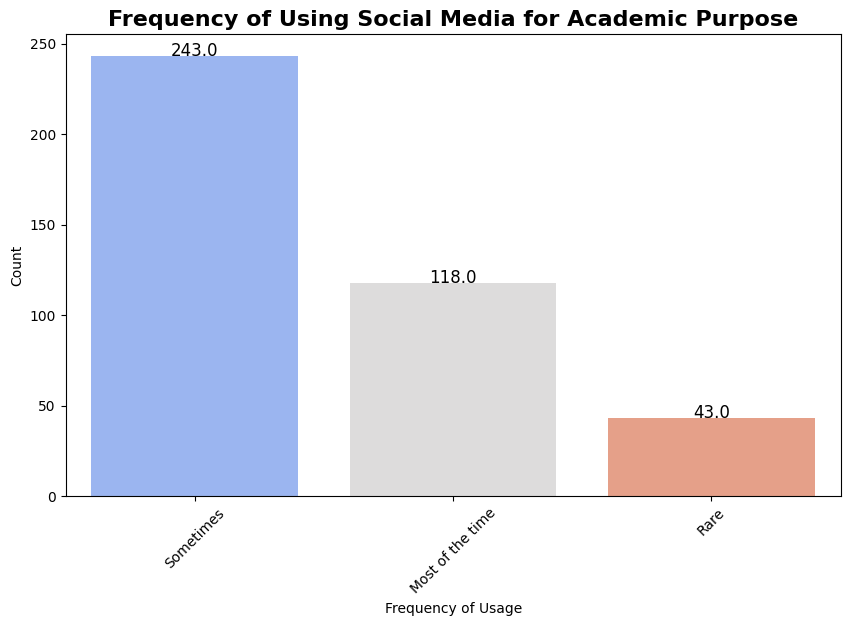

In [91]:
plt.figure(figsize=(10, 6))
academic_usage_counts = df1['Frequency of Using Social Media for Academic Purpose:\n'].value_counts()


sns.barplot(x=academic_usage_counts.index, y=academic_usage_counts.values, palette='coolwarm')


for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=12, color='black')

plt.title('Frequency of Using Social Media for Academic Purpose', fontsize=16, fontweight='bold')
plt.xlabel('Frequency of Usage')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

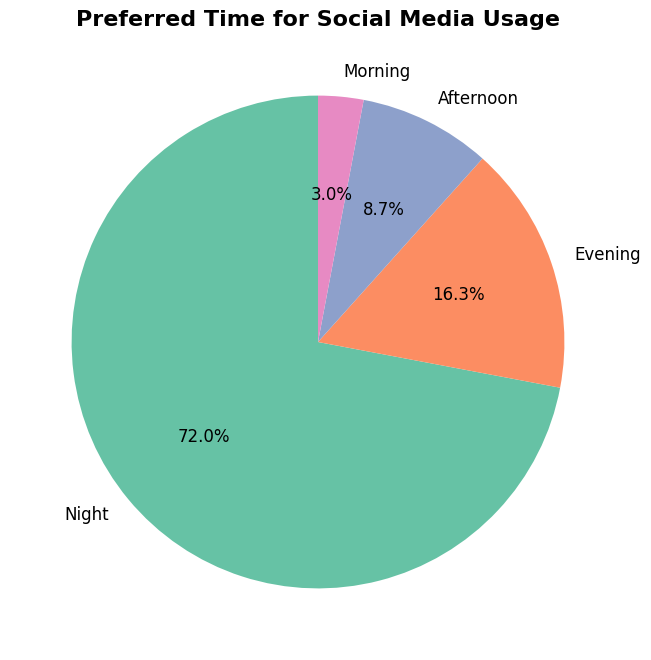

In [92]:

plt.figure(figsize=(8, 8))
time_counts = df1['Preferred Time\n'].value_counts()


colors = sns.color_palette('Set2', len(time_counts))


plt.pie(time_counts, labels=time_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 12})
plt.title('Preferred Time for Social Media Usage', fontsize=16, fontweight='bold')
plt.show()

<ipython-input-93-fdc7764a0a33>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=impact_counts.index, y=impact_counts.values, palette='viridis')


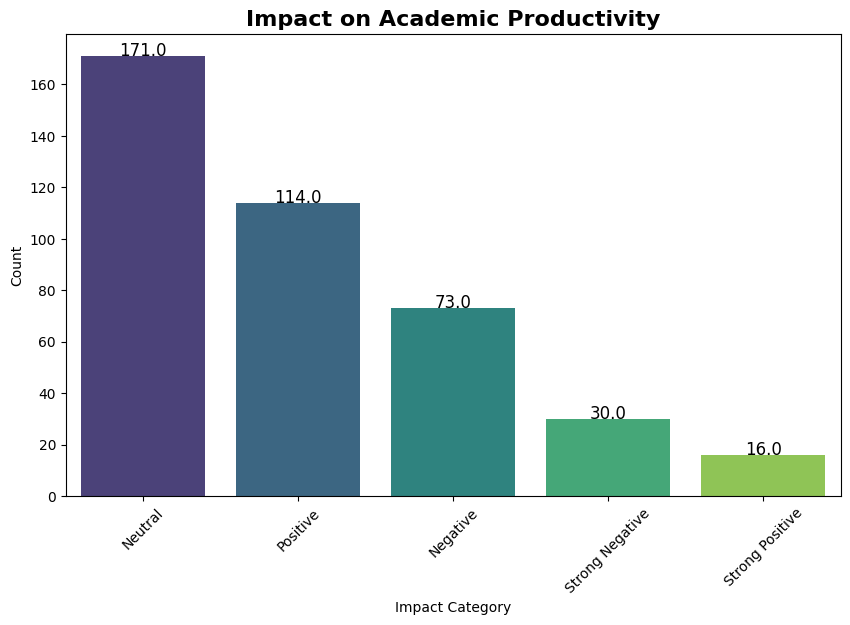

In [93]:
plt.figure(figsize=(10, 6))
impact_counts = df1['Impact on Academic Productivity \n'].value_counts()


sns.barplot(x=impact_counts.index, y=impact_counts.values, palette='viridis')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=12, color='black')

plt.title('Impact on Academic Productivity', fontsize=16, fontweight='bold')
plt.xlabel('Impact Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


**Comparison bteween Checking Social Media and Study/ Assignment Completion Rate**

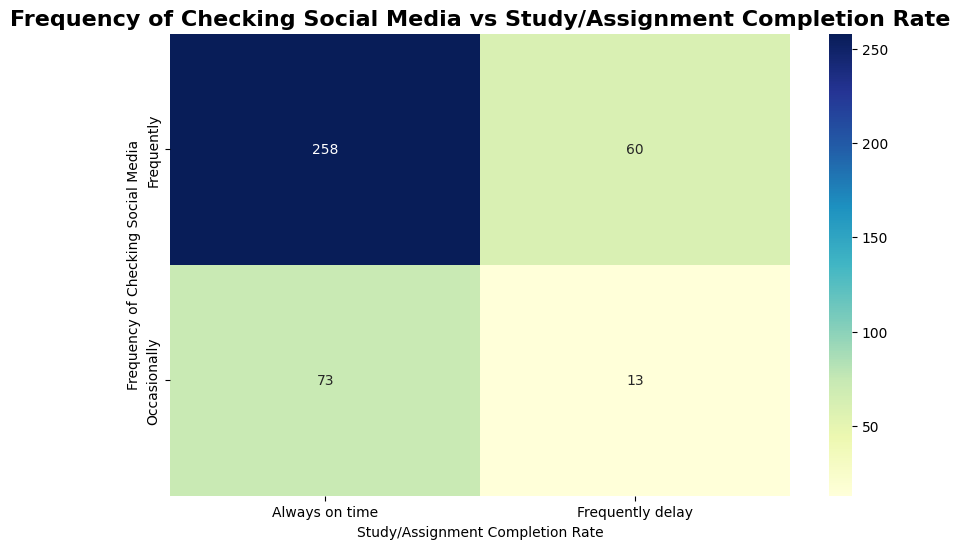

In [94]:
heatmap_data = df1.pivot_table(index='Frequency of Checking social Media \n',
                              columns='Study/Assignment Completion Rate\n',
                              aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='d')

plt.title('Frequency of Checking Social Media vs Study/Assignment Completion Rate', fontsize=16, fontweight='bold')
plt.xlabel('Study/Assignment Completion Rate')
plt.ylabel('Frequency of Checking Social Media')
plt.show()

**Comparison of Time Spent Per Session and Frequency of Checking Social Media**

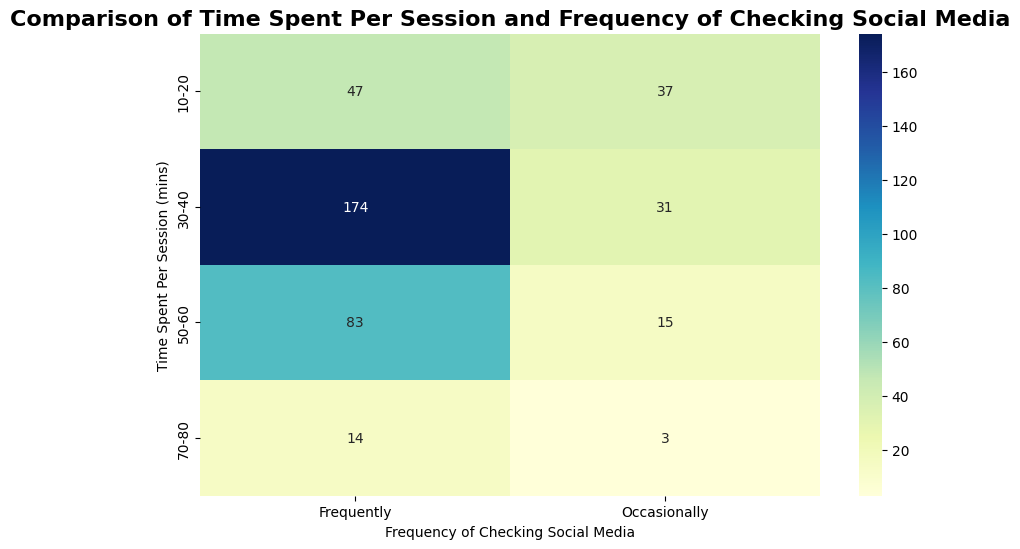

In [95]:

heatmap_data = df1.pivot_table(index='Time Spend Per Session (mins)\n', columns='Frequency of Checking social Media \n', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='d')

plt.title('Comparison of Time Spent Per Session and Frequency of Checking Social Media', fontsize=16, fontweight='bold')
plt.xlabel('Frequency of Checking Social Media')
plt.ylabel('Time Spent Per Session (mins)')
plt.show()


**Comparison of Average Daily Social Media Usage and Study/Assignment Completion Rate**

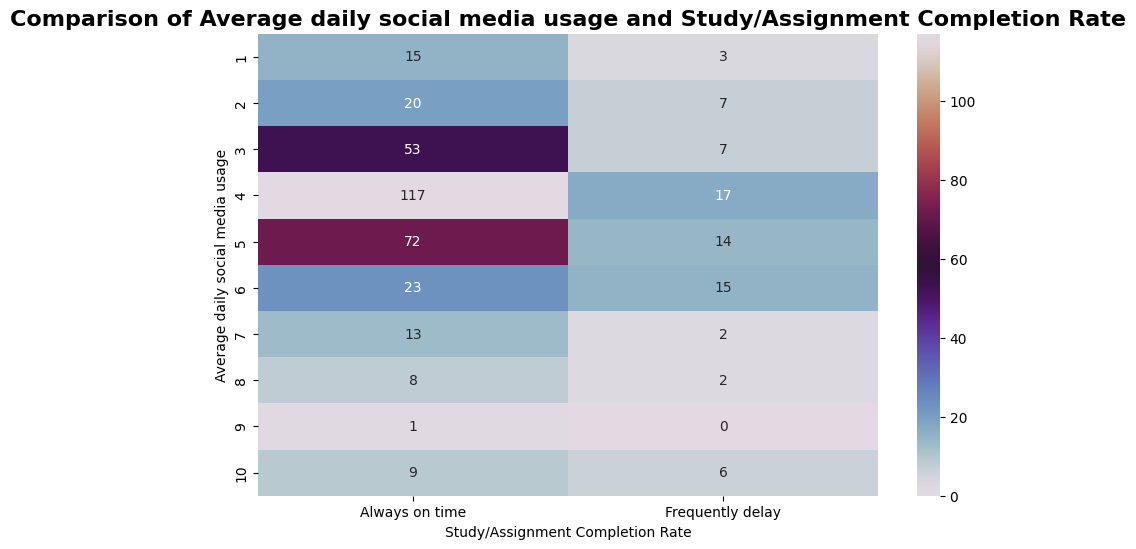

In [96]:

heatmap_data = df1.pivot_table(index='Average daily social media usage (hr)\n', columns='Study/Assignment Completion Rate\n', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='twilight', fmt='d')


plt.title('Comparison of Average daily social media usage and Study/Assignment Completion Rate', fontsize=16, fontweight='bold')
plt.xlabel('Study/Assignment Completion Rate')
plt.ylabel('Average daily social media usage')
plt.show()


***Comparison of Average Daily Social Media Usage and Feeling of Laziness After Social Media ***

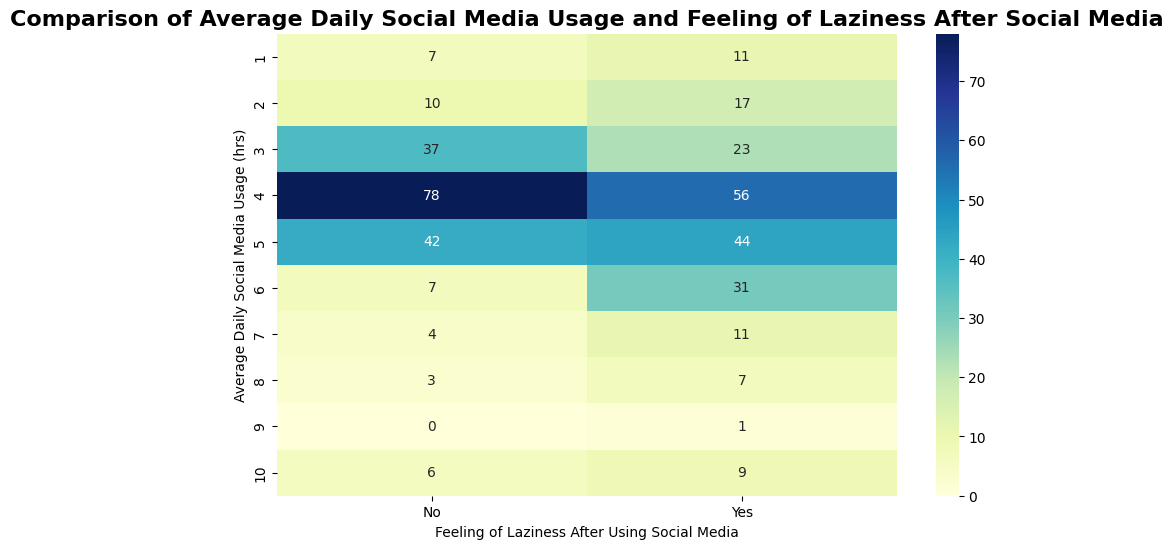

In [97]:
heatmap_data = df1.pivot_table(index='Average daily social media usage (hr)\n', columns='Feeling of Laziness After Using Social Media\n', aggfunc='size', fill_value=0)


plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='d')

plt.title('Comparison of Average Daily Social Media Usage and Feeling of Laziness After Social Media', fontsize=16, fontweight='bold')
plt.xlabel('Feeling of Laziness After Using Social Media')
plt.ylabel('Average Daily Social Media Usage (hrs)')
plt.show()

**Comparison of Average Daily Social Media Usage and Impact on Academic Productivity**

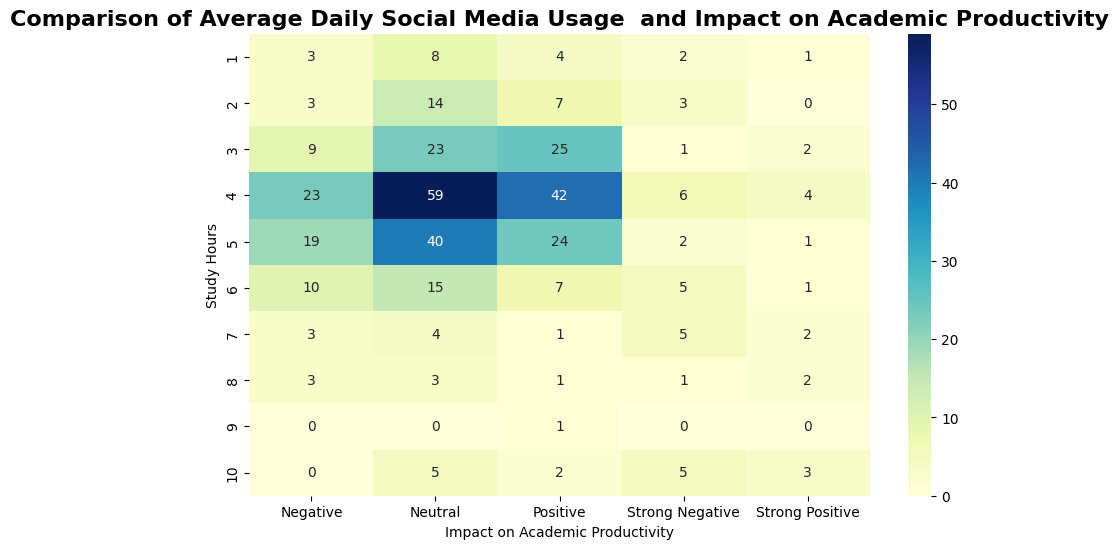

In [98]:
heatmap_data = df.pivot_table(index='Average daily social media usage (hr)\n', columns='Impact on Academic Productivity \n', aggfunc='size', fill_value=0)


plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='d')

plt.title('Comparison of Average Daily Social Media Usage  and Impact on Academic Productivity', fontsize=16, fontweight='bold')
plt.xlabel('Impact on Academic Productivity')
plt.ylabel('Study Hours')
plt.show()


In [6]:
label_encoder = LabelEncoder()

# Apply encoding to the Gender column
df1['Gender'] = label_encoder.fit_transform(df1['Gender'])
df1['Study Hours                '] = label_encoder.fit_transform(df1['Study Hours                '])
df1['Average daily social media usage (hr)\n']=label_encoder.fit_transform(df1['Average daily social media usage (hr)\n'])
df1['Frequency of Checking social Media \n']=label_encoder.fit_transform(df1['Frequency of Checking social Media \n'])
df1['Time Spend Per Session (mins)\n']=label_encoder.fit_transform(df1['Time Spend Per Session (mins)\n'])
df1['Preferred Time\n']=label_encoder.fit_transform(df1['Preferred Time\n'])
df1['Study/Assignment Completion Rate\n']=label_encoder.fit_transform(df1['Study/Assignment Completion Rate\n'])
df1['Feeling of Laziness After Using Social Media\n']=label_encoder.fit_transform(df1['Feeling of Laziness After Using Social Media\n'])
df1['Usage of Social Platform Before Sleep\n']=label_encoder.fit_transform(df1['Usage of Social Platform Before Sleep\n'])
df1['Impact on Academic Productivity \n']=label_encoder.fit_transform(df1['Impact on Academic Productivity \n'])
df1['Most Used Social Media Platform \n']=label_encoder.fit_transform(df1['Most Used Social Media Platform \n'])

df1['Primary Purpose For Using Social Media\n']=label_encoder.fit_transform(df1['Primary Purpose For Using Social Media\n'])
df1['Frequency of Using Social Media for Academic Purpose:\n']=label_encoder.fit_transform(df1['Frequency of Using Social Media for Academic Purpose:\n'])
df1['Do You Think It Contributes To Your Study']=label_encoder.fit_transform(df1['Do You Think It Contributes To Your Study'])



In [7]:
df1['Age'] = df1['Age'].fillna(df['Age'].mean())

In [8]:
df1.isnull().sum().sum()

0

In [9]:
X=df1.drop('Impact on Academic Productivity \n',axis=1)
Y=df1['Impact on Academic Productivity \n']

In [10]:
X

,Age,Gender,Study Hours,Average daily social media usage (hr)\n,Frequency of Checking social Media \n,Time Spend Per Session (mins)\n,Preferred Time\n,Study/Assignment Completion Rate\n,Feeling of Laziness After Using Social Media\n,Usage of Social Platform Before Sleep\n,Most Used Social Media Platform \n,Primary Purpose For Using Social Media\n,Frequency of Using Social Media for Academic Purpose:\n,Do You Think It Contributes To Your Study
0,24.0,1,3,3,0,2,3,0,0,1,0,1,0,1
1,21.0,0,0,3,0,2,0,0,1,1,31,1,2,1
2,23.0,0,1,1,0,0,3,1,1,1,21,1,2,1
3,22.0,0,0,1,0,1,3,1,1,1,21,1,1,0
4,16.0,1,0,4,0,1,3,0,1,1,31,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,23.0,0,1,3,0,2,1,0,1,1,1,1,2,1
400,23.0,0,0,4,0,1,3,0,1,1,0,1,2,1
401,23.0,1,0,3,0,1,3,0,0,1,0,1,2,1
402,23.0,1,0,4,0,1,3,0,0,1,1,1,2,1


In [11]:
Y

,Impact on Academic Productivity \n
0,2
1,3
2,1
3,1
4,1
...,...
399,1
400,1
401,1
402,1


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [13]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train,Y_train)
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test Data:', test_data_accuracy)

Accuracy on Test Data: 0.5308641975308642


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
X_test_prediction1=model.predict(X_test)
test_data_precision=precision_score(X_test_prediction1,Y_test, average='weighted')
print('precision on test data:', test_data_precision)

precision on test data: 0.6225990127666741


In [15]:
X_test_prediction=model.predict(X_test)
test_data_recall=recall_score(X_test_prediction,Y_test, average='weighted')
print('Recall on test data.', test_data_recall)

Recall on test data. 0.5308641975308642


In [16]:
X_test_prediction=model.predict(X_test)
test_data_f1=f1_score(X_test_prediction,Y_test, average='weighted')
print('F1 score on test data', test_data_f1)

F1 score on test data 0.5634158555969255


**Augmentation for Accuracy**

In [17]:
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler



scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


smote = SMOTE(random_state=42)
X_augmented, Y_augmented = smote.fit_resample(X_scaled, Y)


X_train, X_test, Y_train, Y_test = train_test_split(X_augmented, Y_augmented, test_size=0.2, random_state=42)


log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, Y_train)


X_test_pred = log_model.predict(X_test)


augmented_accuracy = accuracy_score(Y_test, X_test_pred)
print("Accuracy on Augmented Data:", augmented_accuracy)



Accuracy on Augmented Data: 0.5029239766081871


**Ensemble model for Accuracy**

In [18]:
from sklearn.ensemble import  GradientBoostingClassifier, VotingClassifier




log_model = LogisticRegression(max_iter=1000, random_state=42)
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)


voting_clf = VotingClassifier(
    estimators=[('Logistic Regression', log_model), ('Random Forest', rf_model), ('Gradient Boosting', gb_model)],
    voting='soft'
)


voting_clf.fit(X_train, Y_train)


X_test_pred = voting_clf.predict(X_test)


ensemble_accuracy = accuracy_score(Y_test, X_test_pred)
print("Accuracy on Test Data (Ensemble Model):", ensemble_accuracy)




Accuracy on Test Data (Ensemble Model): 0.7134502923976608


**Augmentation for F1**

In [19]:

from imblearn.over_sampling import SMOTE



data = {
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'label': [0]*80 + [1]*20
}
df1 = pd.DataFrame(data)


X = df1[['feature1', 'feature2']]
Y = df1['label']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)


smote = SMOTE(random_state=42)
X_train_aug, Y_train_aug = smote.fit_resample(X_train, Y_train)




model = LogisticRegression()
model.fit(X_train_aug, Y_train_aug)


X_test_prediction = model.predict(X_test)
test_data_f1 = f1_score(Y_test, X_test_prediction, average='weighted')

print("\nF1 score on (Augmented data):", test_data_f1)




F1 score on (Augmented data): 0.6849002849002849


**Ensemble model for F1**

In [20]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier



log_model = LogisticRegression(max_iter=1000, random_state=42)
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)


voting_clf = VotingClassifier(
    estimators=[('Logistic Regression', log_model), ('Random Forest', rf_model), ('Gradient Boosting', gb_model)],
    voting='soft'
)


voting_clf.fit(X_train, Y_train)


X_test_pred = voting_clf.predict(X_test)


ensemble_f1_score = f1_score(Y_test, X_test_pred, average='weighted')
print("F1 Score on Test Data (Ensemble Model):", ensemble_f1_score)




F1 Score on Test Data (Ensemble Model): 0.6857142857142857


**Hyperparameter**

In [21]:
model = LogisticRegression(max_iter=1000, random_state=42)


param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train, Y_train)
print(grid_search.best_params_)



best_model = grid_search.best_estimator_



X_train_prediction = best_model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print(f"Training Data Accuracy: {training_data_accuracy}")


X_test_prediction = best_model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print(f"Test Data Accuracy: {test_data_accuracy}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Training Data Accuracy: 0.8
Test Data Accuracy: 0.8


SVM

In [22]:
model1=SVC()
model1.fit(X_train,Y_train)
X_test_prediction = model1.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test Data:', test_data_accuracy)

Accuracy on Test Data: 0.8


In [24]:
X_test_prediction=model1.predict(X_test)
test_data_recall=recall_score(X_test_prediction,Y_test, average='weighted')
print('Recall on test data.', test_data_recall)

Recall on test data. 0.8


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [25]:
X_test_prediction=model1.predict(X_test)
test_data_f1=f1_score(X_test_prediction,Y_test, average='weighted')
print('F1 score on test data', test_data_f1)

F1 score on test data 0.888888888888889


KNN

In [72]:
model2=KNeighborsClassifier()
model2.fit(X_train,Y_train)
X_test_prediction = model2.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test Data:', test_data_accuracy)


Accuracy on Test Data: 0.6875


In [73]:
X_test_prediction=model2.predict(X_test)
test_data_precision=precision_score(X_test_prediction,Y_test, average='weighted')
print('precision on test data:', test_data_precision)

precision on test data: 0.8125


In [74]:
X_test_prediction=model2.predict(X_test)
test_data_recall=recall_score(X_test_prediction,Y_test, average='weighted')
print('Recall on test data.', test_data_recall)

Recall on test data. 0.6875


In [75]:
X_test_prediction=model2.predict(X_test)
test_data_f1=f1_score(X_test_prediction,Y_test, average='weighted')
print('F1 score on test data', test_data_f1)

F1 score on test data 0.7083333333333334


Data Augmentation for Accuracy

In [47]:
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
smote = SMOTE(random_state=42)
X_balanced, Y_balanced = smote.fit_resample(X_scaled, Y)


X_train, X_test, Y_train, Y_test = train_test_split(X_balanced, Y_balanced, test_size=0.2, random_state=42)


knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, Y_train)


X_test_prediction = knn_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy on Test Data (Augmented):', test_data_accuracy)


Accuracy on Test Data (Augmented): 0.6875


Ensemble for Accuracy

In [48]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE




scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


smote = SMOTE(random_state=42)
X_balanced, Y_balanced = smote.fit_resample(X_scaled, Y)


X_train, X_test, Y_train, Y_test = train_test_split(X_balanced, Y_balanced, test_size=0.2, random_state=42)


base_learners = [
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
]

stacking_model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression(), cv=5)


stacking_model.fit(X_train, Y_train)


X_test_prediction = stacking_model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

print('Accuracy on Test Data with Stacking Classifier:', test_data_accuracy)


Accuracy on Test Data with Stacking Classifier: 0.65625


Data Augmentation for F1 Score

In [49]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)


X_train_augmented, Y_train_augmented = smote.fit_resample(X_train, Y_train)


model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_augmented, Y_train_augmented)

X_test_prediction = model.predict(X_test)


from sklearn.metrics import f1_score
test_data_f1 = f1_score(Y_test, X_test_prediction, average='weighted')
print('F1 score on test data after data augmentation:', test_data_f1)


F1 score on test data after data augmentation: 0.6666666666666667


Ensemble model for F1 Score

In [71]:
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier



base_learners = [
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
]


stacking_model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())


stacking_model.fit(X_train_augmented, Y_train_augmented)

X_test_prediction = stacking_model.predict(X_test)


test_data_f1 = f1_score(Y_test, X_test_prediction, average='weighted')
print('F1 score on test data with Stacking Classifier:', test_data_f1)


F1 score on test data with Stacking Classifier: 0.6389743589743591


HyperParameter

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


knn_model = KNeighborsClassifier()


param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'leaf_size': [10, 20, 30, 40, 50]
}


grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)


grid_search.fit(X_train, Y_train)


best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


best_knn_model = grid_search.best_estimator_


X_test_prediction = best_knn_model.predict(X_test)

test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy on Test Data with Hyperparameter Tuning:', test_data_accuracy)


Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best Hyperparameters: {'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
Accuracy on Test Data with Hyperparameter Tuning: 0.65625


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Decision Tree

In [52]:
model3=DecisionTreeClassifier()
model3.fit(X_train,Y_train)
X_test_prediction = model3.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test Data:', test_data_accuracy)

Accuracy on Test Data: 0.59375


In [53]:
X_test_prediction=model3.predict(X_test)
test_data_precision=precision_score(X_test_prediction,Y_test, average='weighted')
print('precision on test data:', test_data_precision)

precision on test data: 0.642578125


In [54]:
X_test_prediction=model3.predict(X_test)
test_data_recall=recall_score(X_test_prediction,Y_test, average='weighted')
print('Recall on test data.', test_data_recall)

Recall on test data. 0.59375


In [55]:
X_test_prediction=model3.predict(X_test)
test_data_f1=f1_score(X_test_prediction,Y_test, average='weighted')
print('F1 score on test data', test_data_f1)

F1 score on test data 0.6039164164164165


Augmentaion for Accuracy

In [56]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

smote = SMOTE(random_state=42)
X_train_augmented, Y_train_augmented = smote.fit_resample(X_train, Y_train)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_augmented, Y_train_augmented)

X_test_prediction = model.predict(X_test)

test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy on Test Data after Data Augmentation:', test_data_accuracy)


Accuracy on Test Data after Data Augmentation: 0.625


Ensemble for Accuracy

In [57]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score


base_learners = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
]


ensemble_model = VotingClassifier(
    estimators=base_learners,
    voting='soft'
)


ensemble_model.fit(X_train, Y_train)


X_test_prediction = ensemble_model.predict(X_test)


test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy on Test Data (Ensemble Model):', test_data_accuracy)


Accuracy on Test Data (Ensemble Model): 0.625


Data Augmentation for F1 Score

In [58]:



smote = SMOTE(random_state=42)

X_train_augmented, Y_train_augmented = smote.fit_resample(X_train, Y_train)


model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_augmented, Y_train_augmented)


X_test_prediction = model.predict(X_test)

test_data_f1 = f1_score(Y_test, X_test_prediction, average='micro')
print('F1 score on test data with data augmentation:', test_data_f1)


F1 score on test data with data augmentation: 0.625



Ensemble model for F1 Score

In [59]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


base_learners = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
]


stacking_model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())


stacking_model.fit(X_train_augmented, Y_train_augmented)


X_test_prediction = stacking_model.predict(X_test)

test_data_f1 = f1_score(Y_test, X_test_prediction, average='micro')
print('F1 score on test data with Stacking Classifier:', test_data_f1)


F1 score on test data with Stacking Classifier: 0.625


Hyperparameter

In [60]:

from sklearn.model_selection import GridSearchCV


#
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'splitter': ['best', 'random']
}


model = DecisionTreeClassifier(random_state=42)


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')


grid_search.fit(X_train, Y_train)


best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")


best_model = grid_search.best_estimator_


X_test_prediction = best_model.predict(X_test)

test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy on Test Data with tuned hyperparameters:', test_data_accuracy)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
Accuracy on Test Data with tuned hyperparameters: 0.75


RandomForest

In [61]:
model4=RandomForestClassifier()
model4.fit(X_train,Y_train)
X_test_prediction = model4.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test Data:', test_data_accuracy)

Accuracy on Test Data: 0.65625


In [62]:
X_test_prediction=model4.predict(X_test)
test_data_precision=precision_score(X_test_prediction,Y_test, average='weighted')
print('precision on test data:', test_data_precision)

precision on test data: 0.705078125


In [63]:
X_test_prediction=model4.predict(X_test)
test_data_recall=recall_score(X_test_prediction,Y_test, average='weighted')
print('Recall on test data.', test_data_recall)


Recall on test data. 0.65625


In [64]:
X_test_prediction=model4.predict(X_test)
test_data_f1=f1_score(X_test_prediction,Y_test, average='weighted')
print('F1 score on test data', test_data_f1)

F1 score on test data 0.6648523523523524


Data Augmentation for Accuracy

In [65]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)
X_train_augmented, Y_train_augmented = smote.fit_resample(X_train, Y_train)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_augmented, Y_train_augmented)

X_test_prediction = model.predict(X_test)

test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy on Test Data with SMOTE augmentation:', test_data_accuracy)


Accuracy on Test Data with SMOTE augmentation: 0.6875


Ensemble model for Accuracy

In [66]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier



base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42))
]

stacking_model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

stacking_model.fit(X_train_augmented, Y_train_augmented)


X_test_prediction = stacking_model.predict(X_test)

test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy on Test Data with Classifier:', test_data_accuracy)


Accuracy on Test Data with Classifier: 0.625


Augmented for F1 Score

In [67]:
from imblearn.over_sampling import SMOTE



smote = SMOTE(random_state=42)
X_train_augmented, Y_train_augmented = smote.fit_resample(X_train, Y_train)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_augmented, Y_train_augmented)

X_test_prediction = model.predict(X_test)


test_data_f1 = f1_score(Y_test, X_test_prediction, average='micro')
print('F1 score on test data with SMOTE augmentation:', test_data_f1)


F1 score on test data with SMOTE augmentation: 0.6875


Ensemble model for F1

In [68]:
from sklearn.ensemble import StackingClassifier

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier



base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42))
]

stacking_model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

stacking_model.fit(X_train, Y_train)

X_test_prediction = stacking_model.predict(X_test)

test_data_f1 = f1_score(Y_test, X_test_prediction, average='micro')
print('F1 score on test data with Stacking Classifier:', test_data_f1)


F1 score on test data with Stacking Classifier: 0.625


HyperParameter

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


model = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
}


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')


grid_search.fit(X_train, Y_train)


best_model = grid_search.best_estimator_


X_test_prediction = best_model.predict(X_test)


test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy on Test Data with Hyperparameter Tuning:', test_data_accuracy)

print('Best Hyperparameters:', grid_search.best_params_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Accuracy on Test Data with Hyperparameter Tuning: 0.625
Best Hyperparameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}
